In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import SGD
from keras import optimizers
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [2]:
character_data = pd.read_csv('A_Z Handwritten Data.csv').astype('float32')

In [3]:
character_data.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
character_df = pd.DataFrame(character_data)

In [5]:
character_df = character_df[:100000]

In [6]:
character_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 785 entries, 0 to 0.648
dtypes: float32(785)
memory usage: 299.5 MB


In [8]:
x = character_df.drop('0', axis = 1)
y = character_df['0']

In [9]:
x.shape

(100000, 784)

In [10]:
len(y)

100000

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [12]:
x_train = np.reshape(x_train.values, (x_train.shape[0], 28, 28))
x_test = np.reshape(x_test.values, (x_test.shape[0], 28, 28))

In [13]:
x_train.shape

(80000, 28, 28)

In [15]:
x_test.shape

(20000, 28, 28)

In [16]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)

In [17]:
x_train.shape

(80000, 28, 28, 1)

In [18]:
x_test.shape

(20000, 28, 28, 1)

In [19]:
categorical_train = to_categorical(y_train, num_classes = 26, dtype = 'int')

In [20]:
categorical_train.shape

(80000, 26)

In [36]:
# Data Preparation Part Ends Here.

In [21]:
word_dict = {
    0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',
    10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',
    18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'
}

In [22]:
my_model = Sequential()

my_model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
my_model.add(MaxPool2D(pool_size = (2, 2), strides = 2))

my_model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', padding = 'same'))
my_model.add(MaxPool2D(pool_size = (2, 2), strides = 2))

my_model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu', padding = 'valid'))
my_model.add(MaxPool2D(pool_size = (2, 2), strides = 2))

my_model.add(Flatten())

my_model.add(Dense(64, activation = "relu"))
my_model.add(Dense(128, activation = "relu"))

my_model.add(Dense(26, activation = "softmax"))

In [23]:
my_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [24]:
model_fit = my_model.fit(x_train, categorical_train, epochs = 3)

Epoch 1/3
80000/80000 [==============================] - 231s 3ms/step - loss: 0.1839 - accuracy: 0.9553
Epoch 2/3
80000/80000 [==============================] - 314s 4ms/step - loss: 0.0565 - accuracy: 0.9832
Epoch 3/3
80000/80000 [==============================] - 228s 3ms/step - loss: 0.0458 - accuracy: 0.9862


In [37]:
# Model Training Part Ends Here

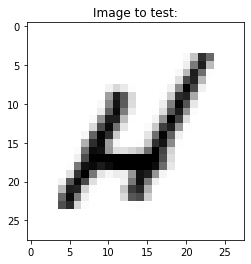

In [27]:
plt.imshow(x_test[1051], cmap = 'Greys')
plt.title('Image to test:')
plt.show()

In [28]:
x_test[1051].shape

(28, 28, 1)

In [29]:
img_test = np.expand_dims(x_test[1051], axis=0)
img_test.shape

(1, 28, 28, 1)

In [30]:
print('The letter predicted by the model is {}'.format(word_dict[np.argmax(my_model.predict(img_test))]))

The letter predicted by the model is H


In [38]:
# Model Prediction Part Ends Here

In [31]:
from bing_image_downloader import downloader

In [32]:
pred = str(word_dict[np.argmax(my_model.predict(img_test))])
list_objects = ['apple', 'ball', 'cat', 'dog', 'elephant', 'frog', 'goat', 'hut', 'ice-cream', 'jug', 
                'kite', 'lion', 'mango', 'nest', 'owl', 'parrot', 'queen', 'rabbit', 'shoes', 'tap', 'umbrella', 
                'van', 'water', 'xmas tree', 'zebra']
ele = ''
for i in range(len(list_objects)):
    if pred == list_objects[i][0].upper():
        ele = list_objects[i]
query = ele
downloader.download(query, limit=1, adult_filter_off=True, force_replace=False, timeout=60, verbose=True)

[%] Downloading Images to /Users/vanshajgupta/CharacterRecognition/dataset/hut


[!!]Indexing page: 1

[%] Indexed 1 Images on Page 1.


[%] Downloading Image #1 from https://i.pinimg.com/736x/d4/35/16/d43516ff22821010a6f241ed793b99db.jpg
[%] File Downloaded !



[%] Done. Downloaded 1 images.


In [34]:
import os

Text(0.5, 1.0, 'Image of a hut')

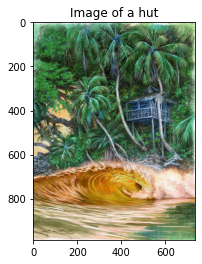

In [41]:
img_display = cv2.imread(os.path.join('dataset',ele,'Image_1.jpg'))
plt.imshow(img_display)
plt.title('Image of a {}'.format(ele))

In [39]:
# Image Display Part Ends Here